In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
train_data.shape

(7613, 5)

In [5]:
X = train_data['text']
y = train_data['target']

In [6]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
vocab_size = 1000
embedding_dim = 16
max_length = 1000
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_x)

word_index = tokenizer.word_index

training_sequence = tokenizer.texts_to_sequences(train_x)
training_padded = pad_sequences(training_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequence = tokenizer.texts_to_sequences(test_x)
testing_padded = pad_sequences(testing_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
training_padded = np.array(training_padded)
training_labels = np.array(train_y)

testing_padded = np.array(testing_padded)
testing_labels = np.array(test_y)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
191/191 - 1s - loss: 0.6848 - accuracy: 0.5681 - val_loss: 0.6811 - val_accuracy: 0.5791
Epoch 2/10
191/191 - 0s - loss: 0.6833 - accuracy: 0.5681 - val_loss: 0.6795 - val_accuracy: 0.5791
Epoch 3/10
191/191 - 0s - loss: 0.6825 - accuracy: 0.5681 - val_loss: 0.6789 - val_accuracy: 0.5791
Epoch 4/10
191/191 - 0s - loss: 0.6811 - accuracy: 0.5681 - val_loss: 0.6766 - val_accuracy: 0.5791
Epoch 5/10
191/191 - 0s - loss: 0.6779 - accuracy: 0.5681 - val_loss: 0.6751 - val_accuracy: 0.5791
Epoch 6/10
191/191 - 0s - loss: 0.6715 - accuracy: 0.5703 - val_loss: 0.6623 - val_accuracy: 0.5791
Epoch 7/10
191/191 - 0s - loss: 0.6577 - accuracy: 0.5961 - val_loss: 0.6432 - val_accuracy: 0.6612
Epoch 8/10
191/191 - 0s - loss: 0.6321 - accuracy: 0.6603 - val_loss: 0.6140 - val_accuracy: 0.7255
Epoch 9/10
191/191 - 0s - loss: 0.6001 - accuracy: 0.7033 - val_loss: 0.5925 - val_accuracy: 0.7019
Epoch 10/10
191/191 - 0s - loss: 0.5742 - accuracy: 0.7223 - val_loss: 0.5584 - val_accuracy: 0.7367

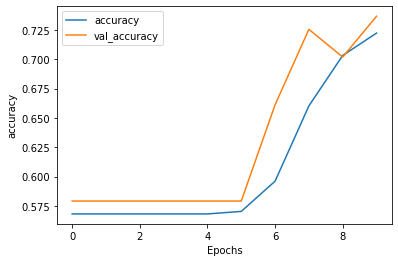

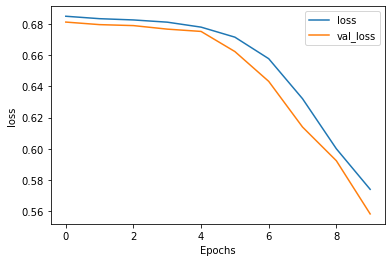

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")